In [1]:
import pandas as pd

data1_df = pd.read_csv("UserData1.csv", sep='\t')
data1_df.head()

,Time,Distance,Width
0,745,200,50
1,842,200,50
2,641,200,50
3,720,200,50
4,689,200,50


In [2]:
data2_df = pd.read_csv("UserData1.csv")
data2_df.head()

,Time,Distance,Width
0,640,200,50
1,622,200,50
2,629,200,50
3,629,200,50
4,532,200,50


In [3]:
data1_df_len = data1_df.Time.size
data2_df_len = data2_df.Time.size

In [4]:
data1_df['IndexDifficulty']=data1_df['throughput']=0.0
data2_df['IndexDifficulty']=data2_df['throughput']=0.0

In [5]:
import math
for i in range(data1_df_len):
    data1_df['IndexDifficulty'][i] = math.log(((data1_df['Distance'][i]/data1_df['Width'][i])+1),2)
    data1_df['throughput'][i] = (data1_df['IndexDifficulty'][i]/(data1_df['Time'][i])*1000)

C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
import math
for i in range(data2_df_len):
    data2_df['IndexDifficulty'][i] = math.log(((data2_df['Distance'][i]/data2_df['Width'][i])+1),2)
    data2_df['throughput'][i] = (data2_df['IndexDifficulty'][i]/(data2_df['Time'][i])*1000)

C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
data1_df.astype('float').head()

,Time,Distance,Width,IndexDifficulty,throughput
0,745.0,200.0,50.0,2.321928,3.116682
1,842.0,200.0,50.0,2.321928,2.757634
2,641.0,200.0,50.0,2.321928,3.622353
3,720.0,200.0,50.0,2.321928,3.224900
4,689.0,200.0,50.0,2.321928,3.369997


In [8]:
data2_df.astype('float').head()

,Time,Distance,Width,IndexDifficulty,throughput
0,640.0,200.0,50.0,2.321928,3.628013
1,622.0,200.0,50.0,2.321928,3.733003
2,629.0,200.0,50.0,2.321928,3.691460
3,629.0,200.0,50.0,2.321928,3.691460
4,532.0,200.0,50.0,2.321928,4.364526


In [9]:
Y_time_data1 = data1_df['Time']
X_ID_data1 = data1_df['IndexDifficulty'][:]

In [10]:
Y_time_data2 = data2_df['Time']
X_ID_data2 = data2_df['IndexDifficulty'][:]

In [11]:
X_ID_data1 = X_ID_data1.reshape(data1_df_len,1)


C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [12]:
X_ID_data2 = X_ID_data2.reshape(data2_df_len,1)

C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
regr1 = linear_model.LinearRegression()
regr1.fit(X_ID_data1, Y_time_data1)
y_pred1 = regr1.predict(X_ID_data1)

In [14]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_ID_data2, Y_time_data2)
y_pred2 = regr2.predict(X_ID_data2)

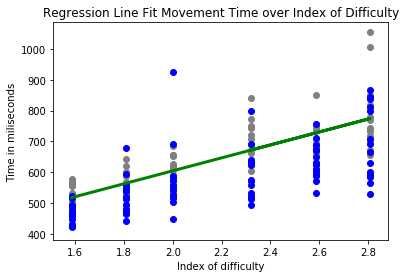

In [15]:
plt.title('Regression Line Fit Movement Time over Index of Difficulty')
plt.scatter(X_ID_data1, Y_time_data1,  color='grey')
plt.scatter(X_ID_data2, Y_time_data2,  color='blue')
plt.plot(X_ID_data1, y_pred1, color='green', linewidth=3)
plt.xlabel('Index of difficulty')
plt.ylabel('Time in miliseconds')
plt.show()

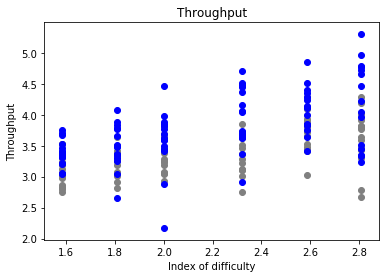

In [16]:
plt.title('Throughput')
plt.scatter(data1_df.IndexDifficulty, data1_df.throughput,  color='grey')
plt.scatter(data2_df.IndexDifficulty, data2_df.throughput,  color='blue')
plt.xlabel('Index of difficulty')
plt.ylabel('Throughput')
plt.show()

In [17]:
x_unique1 = np.unique(X_ID_data1)
x_unique2 = np.unique(X_ID_data2)
print("unique in 1 ", x_unique1)
print("unique in 2 ", x_unique2)

unique in 1  [ 1.5849625   1.80735492  2.          2.32192809  2.5849625   2.80735492]
unique in 2  [ 1.5849625   1.80735492  2.          2.32192809  2.5849625   2.80735492]


In [18]:
data1_df.head()

,Time,Distance,Width,IndexDifficulty,throughput
0,745,200,50,2.321928,3.116682
1,842,200,50,2.321928,2.757634
2,641,200,50,2.321928,3.622353
3,720,200,50,2.321928,3.224900
4,689,200,50,2.321928,3.369997


In [19]:
final_means1 = []
throughput_means1 = []
for val in x_unique1:
    some_array1 = (data1_df['IndexDifficulty']==val)
    final_means1.append(np.sum(data1_df['Time'][some_array1])/(data1_df['Time'][some_array1]).size)  
    throughput_means1.append(np.sum(data1_df['throughput'][some_array1])/(data1_df['throughput'][some_array1]).size)

In [20]:
final_means2 = []
throughput_means2 = []
for val in x_unique2:
    some_array2 = (data2_df['IndexDifficulty']==val)
    final_means2.append(np.sum(data2_df['Time'][some_array2])/(data2_df['Time'][some_array2]).size) 
    throughput_means2.append(np.sum(data2_df['throughput'][some_array2])/(data2_df['throughput'][some_array2]).size)

In [21]:
final_means1

[515.7333333333333,
 563.0666666666667,
 602.4666666666667,
 696.6,
 696.3333333333334,
 785.6666666666666]

In [22]:
final_means2

[469.3333333333333,
 522.3333333333334,
 573.6666666666666,
 595.4666666666667,
 638.5333333333333,
 687.9333333333333]

In [23]:
throughput_means1

[3.093770775146981,
 3.223913210908111,
 3.3392885647820743,
 3.3605462285148784,
 3.73954901264686,
 3.633509420752474]

In [24]:
throughput_means2

[3.389694115502356,
 3.497894806602263,
 3.5767603109289205,
 3.9609765996863917,
 4.080277372019743,
 4.1872807755146475]

In [25]:
#data1_df['Time'][some_array1]

In [26]:
#data1_df['IndexDifficulty'][some_array1]

In [27]:
some_array1.size

90

In [28]:
data1_df['User'] = 'User1'
data2_df['User'] = 'User2'

In [29]:
# tdata1_df['User'] = 'User1'
# tdata2_df['User'] = 'User2'

In [30]:
Final_DF = pd.concat([data1_df, data2_df])


In [31]:
Final_DF.shape

(180, 6)

In [32]:
data1_df.head()

,Time,Distance,Width,IndexDifficulty,throughput,User
0,745,200,50,2.321928,3.116682,User1
1,842,200,50,2.321928,2.757634,User1
2,641,200,50,2.321928,3.622353,User1
3,720,200,50,2.321928,3.224900,User1
4,689,200,50,2.321928,3.369997,User1


Time VS IndexDifficulty


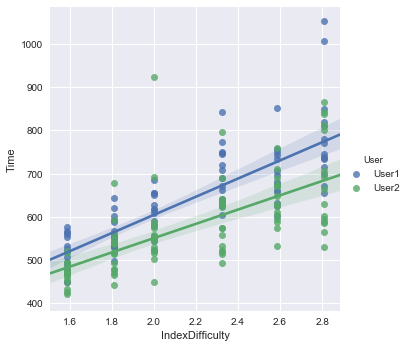

In [33]:
sns.set(color_codes=True)
print("Time VS IndexDifficulty")

sns.lmplot(x='IndexDifficulty', y='Time',hue="User", data=Final_DF)
#sns.lmplot(x='IndexDifficulty', y='Time', data=data2_df)

throughput VS IndexDifficulty


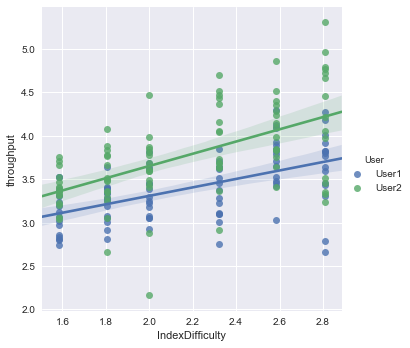

In [34]:
sns.set(color_codes=True)
print("throughput VS IndexDifficulty")

sns.lmplot(x='IndexDifficulty', y='throughput',hue="User", data=Final_DF)

In [35]:
#data1_df.columns

In [36]:
d1 = {'IndexDiff': x_unique1, 'time': final_means1, 'user': 'user1'}
data1 = pd.DataFrame(data=d1)

In [37]:
d2 = {'IndexDiff': x_unique2, 'time': final_means2, 'user': 'user2'}
data2 = pd.DataFrame(data=d2)

In [38]:
t1 = {'IndexDiff': x_unique1, 'throughput': throughput_means1, 'user': 'user1'}
tData1 = pd.DataFrame(data=t1)

In [39]:
t2 = {'IndexDiff': x_unique2, 'throughput': throughput_means2, 'user': 'user2'}
tData2 = pd.DataFrame(data=t2)

In [40]:
#

In [41]:
data1

,IndexDiff,time,user
0,1.584963,515.733333,user1
1,1.807355,563.066667,user1
2,2.000000,602.466667,user1
3,2.321928,696.600000,user1
4,2.584963,696.333333,user1
5,2.807355,785.666667,user1


In [42]:
data2

,IndexDiff,time,user
0,1.584963,469.333333,user2
1,1.807355,522.333333,user2
2,2.000000,573.666667,user2
3,2.321928,595.466667,user2
4,2.584963,638.533333,user2
5,2.807355,687.933333,user2


In [43]:
tData1

,IndexDiff,throughput,user
0,1.584963,3.093771,user1
1,1.807355,3.223913,user1
2,2.000000,3.339289,user1
3,2.321928,3.360546,user1
4,2.584963,3.739549,user1
5,2.807355,3.633509,user1


In [44]:
tData2

,IndexDiff,throughput,user
0,1.584963,3.389694,user2
1,1.807355,3.497895,user2
2,2.000000,3.576760,user2
3,2.321928,3.960977,user2
4,2.584963,4.080277,user2
5,2.807355,4.187281,user2


In [45]:
regress_df1 = pd.concat([data1, data2])
regress_df2 = pd.concat([tData1, tData2])

In [46]:
regress_df1

,IndexDiff,time,user
0,1.584963,515.733333,user1
1,1.807355,563.066667,user1
2,2.000000,602.466667,user1
3,2.321928,696.600000,user1
4,2.584963,696.333333,user1
5,2.807355,785.666667,user1
0,1.584963,469.333333,user2
1,1.807355,522.333333,user2
2,2.000000,573.666667,user2
3,2.321928,595.466667,user2


In [47]:
regress_df2

,IndexDiff,throughput,user
0,1.584963,3.093771,user1
1,1.807355,3.223913,user1
2,2.000000,3.339289,user1
3,2.321928,3.360546,user1
4,2.584963,3.739549,user1
5,2.807355,3.633509,user1
0,1.584963,3.389694,user2
1,1.807355,3.497895,user2
2,2.000000,3.576760,user2
3,2.321928,3.960977,user2


Regression on the first one


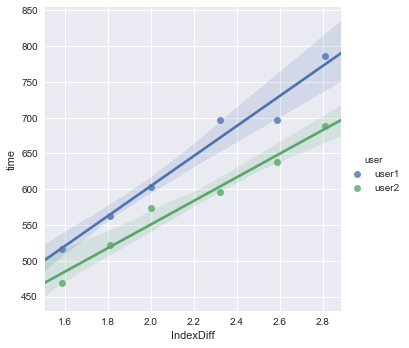

In [48]:
sns.set(color_codes=True)

print("Regression on the first one")
sns.lmplot(x="IndexDiff", y="time", data=regress_df1, hue="user")

Regression on the second one


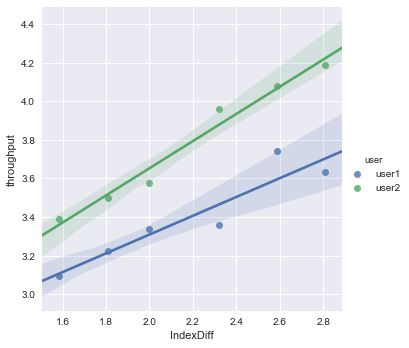

In [49]:
print("Regression on the second one")
sns.lmplot(x="IndexDiff", y="throughput", data=regress_df2, hue="user")

In [50]:
y_pred2 = regr2.predict(X_ID_data2)

In [54]:
print("Regression Coefficients for Time Vs IDe are : ", regr1.coef_, " and ", regr1.intercept_)

Regression Coefficients for Time Vs IDe are :  [ 209.9055911]  and  184.787637566


In [56]:
print("Regression Coefficients for throughput are : ", regr2.coef_, " and ", regr2.intercept_)

Regression Coefficients for throughput are :  [ 165.06896405]  and  220.629983296


In [74]:
from sklearn import datasets, linear_model
# data1	IndexDiff	time	user

r1 = linear_model.LinearRegression()
r1.fit(x, data1.time)
yp1 = r1.predict(x)

In [76]:
r1.coef_

array([ 209.9055911])

In [77]:
r1.intercept_

184.78763756590973

In [70]:
x = [data1["IndexDiff"]]

In [72]:
x = data1["IndexDiff"].reshape(-1,1)

C:\Users\DarkMatter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [73]:
x

array([[ 1.5849625 ],
       [ 1.80735492],
       [ 2.        ],
       [ 2.32192809],
       [ 2.5849625 ],
       [ 2.80735492]])

In [71]:
x

[0    1.584963
 1    1.807355
 2    2.000000
 3    2.321928
 4    2.584963
 5    2.807355
 Name: IndexDiff, dtype: float64]

In [ ]:
print("Regression on the second one")
sns.lmplot(x="IndexDiff", y="throughput", data=regress_df2, hue="user")

In [ ]:
print("Regression on the first one")
sns.lmplot(x="IndexDiff", y="time", data=regress_df1, hue="user")

In [78]:
data1

,IndexDiff,time,user
0,1.584963,515.733333,user1
1,1.807355,563.066667,user1
2,2.000000,602.466667,user1
3,2.321928,696.600000,user1
4,2.584963,696.333333,user1
5,2.807355,785.666667,user1


In [79]:
data2

,IndexDiff,time,user
0,1.584963,469.333333,user2
1,1.807355,522.333333,user2
2,2.000000,573.666667,user2
3,2.321928,595.466667,user2
4,2.584963,638.533333,user2
5,2.807355,687.933333,user2


In [80]:
tData1

,IndexDiff,throughput,user
0,1.584963,3.093771,user1
1,1.807355,3.223913,user1
2,2.000000,3.339289,user1
3,2.321928,3.360546,user1
4,2.584963,3.739549,user1
5,2.807355,3.633509,user1


In [81]:
tData2

,IndexDiff,throughput,user
0,1.584963,3.389694,user2
1,1.807355,3.497895,user2
2,2.000000,3.576760,user2
3,2.321928,3.960977,user2
4,2.584963,4.080277,user2
5,2.807355,4.187281,user2


In [83]:
from sklearn import datasets, linear_model
# regr1 = linear_model.LinearRegression()
# regr1.fit(X_ID_data1, Y_time_data1)
# y_pred1 = regr1.predict(X_ID_data1)

r1 = linear_model.LinearRegression()
r1.fit(x, data1.time)
yp1 = r1.predict(x)

In [88]:
y = np.array(data1.time)

In [91]:
x = np.array(data1.IndexDiff).reshape(-1,1)

In [92]:
d1u1 = linear_model.LinearRegression()
d1u1.fit(x,y)
a = d1u1.predict(data1.IndexDiff)

d1u1.coef_

In [114]:
print("Time vs Index of Difficulty coefficients for User 1")
print(d1u1.coef_ , d1u1.intercept_)

Time vs Index of Difficulty coefficients for User 1
[ 209.9055911] 184.787637566


In [97]:
b = np.array(data2.time)

In [98]:
a = np.array(data2.IndexDiff).reshape(-1,1)

In [99]:
d1u2 = linear_model.LinearRegression()
d1u2.fit(a,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
print("Time vs Index of Difficulty coefficients for User 2")
print(d1u2.coef_ , d1u2.intercept_)

Time vs Index of Difficulty coefficients for User 2
[ 165.06896405] 220.629983296


In [108]:
n = np.array(tData1.throughput)
m = np.array(tData1.IndexDiff).reshape(-1,1)
d2u1 = linear_model.LinearRegression()
d2u1.fit(m,n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
print("Throughput vs Index of Difficulty coefficients for User 1")
print(d2u1.coef_ , d2u1.intercept_)

Throughput vs Index of Difficulty coefficients for User 1
[ 0.48707027] 2.33446000818


In [112]:
r = np.array(tData2.throughput)
p = np.array(tData2.IndexDiff).reshape(-1,1)
d2u2 = linear_model.LinearRegression()
d2u2.fit(p,r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
print("Throughput vs Index of Difficulty coefficients for User 2")
print(d2u2.coef_ , d2u2.intercept_)

Throughput vs Index of Difficulty coefficients for User 2
[ 0.70421064] 2.24385047806
